In [1]:
#Python Data Analysis imports 
import pandas as pd 
from pandas import Series, DataFrame 
import numpy as np

#Visualisation imports 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 

#To grab stock data 
from pandas_datareader import DataReader 
from datetime import datetime 

We are going to analyse the historical performance of NASDAQ over the past years.

In [2]:
df = pd.read_csv("NASDAQ_100_Data_From_2010.csv", delim_whitespace=True)

In [3]:
df['Volume'] = pd.to_numeric(df['Volume'], downcast='float')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       271680 non-null  datetime64[ns]
 1   Open       271680 non-null  float64       
 2   High       271680 non-null  float64       
 3   Low        271680 non-null  float64       
 4   Close      271680 non-null  float64       
 5   Adj-Close  271680 non-null  float64       
 6   Volume     271680 non-null  float32       
 7   Name       271680 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(5), object(1)
memory usage: 15.5+ MB


# Some descriptions regarding the attributes

I have downlaoded the daily stock prices using Kaggle. It's an eleven-year-data capturing Open, High, Low, Close and Volume. 

* Open: the price of the stock when the market opens in the morning. 
* Close: the price of the stock when the market closed in the evening. 
* High: highest price the stock reached during that day. 
* Low: lowest price the stock is traded on that day. 
* Volume: the total amount of stocks traded on that day. 

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj-Close,Volume,Name
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600.0,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904768.0,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000.0,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200.0,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610816.0,AAPL


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj-Close,Volume,Name
271675,2021-09-03,295.325012,301.804993,292.029999,298.290009,298.290009,6127900.0,ZM
271676,2021-09-07,298.295013,300.980011,294.799988,299.959991,299.959991,4251900.0,ZM
271677,2021-09-08,299.549988,299.959991,290.529999,293.600006,293.600006,3934400.0,ZM
271678,2021-09-09,292.160004,297.570007,291.130005,295.859985,295.859985,3350100.0,ZM
271679,2021-09-10,296.910004,306.263000,296.809998,301.500000,301.500000,6089600.0,ZM


In [6]:
df.describe()

,Open,High,Low,Close,Adj-Close,Volume
count,271680.000000,271680.000000,271680.000000,271680.000000,271680.000000,2.716800e+05
mean,130.147060,131.678573,128.564517,130.173960,126.929715,1.052669e+07
std,259.463324,262.249242,256.522832,259.455010,260.156874,3.925113e+07
min,0.610000,0.660000,0.610000,0.650000,0.612270,0.000000e+00
25%,32.549999,32.950001,32.150002,32.570000,28.001979,1.332175e+06
50%,59.810001,60.504999,59.119999,59.849998,55.599998,2.759400e+06
75%,117.139999,118.470001,115.820000,117.190002,114.705492,6.889500e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.880998e+09


# What's the change in stock's price over time?

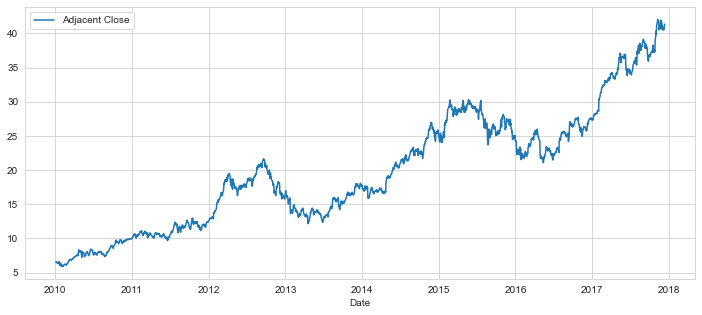

In [7]:
#Plotting the stock's adjusted clsoing price using matplotlib.pyplot 
figure, axes = plt.subplots(figsize=(12, 5))
axes.plot(df['Date'].head(2000), df['Adj-Close'].head(2000), label='Adjacent Close')
axes.set_xlabel('Date')
axes.legend(loc = 'upper left')

# What was the moving average of the stock? 

Check out the moving average for stocks over a 10, 20 and 50 day period of time. Later we will add that information to the stock's dataframe.

In [8]:
moving_average = [10, 20, 50]

for ma in moving_average:
    column_name = "MA for %s days" %(str(ma))
    df[column_name] = df['Adj-Close'].rolling(window=ma, center=False).mean()

In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj-Close,Volume,Name,MA for 10 days,MA for 20 days,MA for 50 days
271675,2021-09-03,295.325012,301.804993,292.029999,298.290009,298.290009,6127900.0,ZM,322.196997,337.931996,361.491599
271676,2021-09-07,298.295013,300.980011,294.799988,299.959991,299.959991,4251900.0,ZM,318.062997,333.762996,360.041399
271677,2021-09-08,299.549988,299.959991,290.529999,293.600006,293.600006,3934400.0,ZM,313.397998,329.815497,358.136199
271678,2021-09-09,292.160004,297.570007,291.130005,295.859985,295.859985,3350100.0,ZM,309.209998,326.680496,356.158799
271679,2021-09-10,296.910004,306.263000,296.809998,301.500000,301.500000,6089600.0,ZM,305.296997,323.612497,354.448199


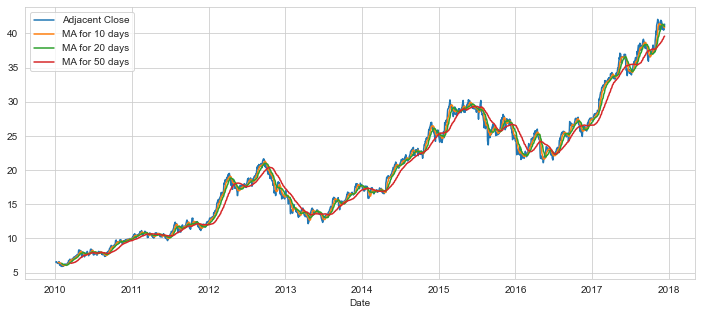

In [10]:
figure, axes = plt.subplots(figsize=(12, 5))
axes.plot(df['Date'].head(2000), df['Adj-Close'].head(2000), label='Adjacent Close')
axes.plot(df['Date'].head(2000), df['MA for 10 days'].head(2000), label='MA for 10 days')
axes.plot(df['Date'].head(2000), df['MA for 20 days'].head(2000), label='MA for 20 days')
axes.plot(df['Date'].head(2000), df['MA for 50 days'].head(2000), label='MA for 50 days')
axes.set_xlabel('Date')
axes.legend(loc = 'upper left')

Moving averages for more days seem to have a smoother plot, as they're less reliable on daily fluctuations. So even though NASDAQ has a slightly dip in year 2012, 2015 and 2018, it's generally been on an upward trend. 

# What was the daily return average of a stock? 

In [11]:
#The daily return column can be created by using the percentage change over the adjusted closing price
df['Daily-Return'] = df['Adj-Close'].pct_change()

In [12]:
df['Daily-Return'].tail()

271675    0.010844
271676    0.005599
271677   -0.021203
271678    0.007697
271679    0.019063
Name: Daily-Return, dtype: float64

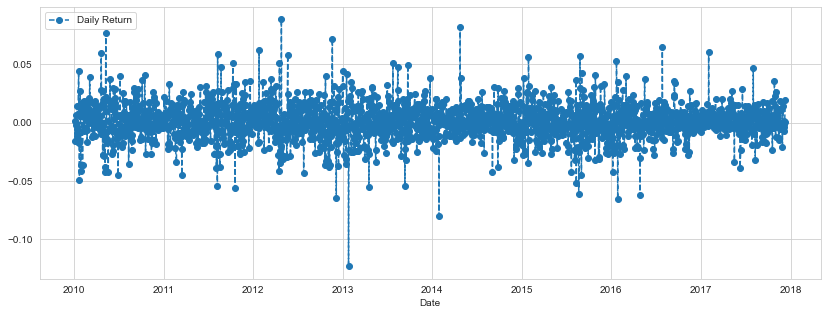

In [35]:
#Plotting the daily return 
figure, axes = plt.subplots(figsize=(14, 5))
axes.plot(df['Date'].head(2000), df['Daily-Return'].head(2000), linestyle='--', marker='o', label='Daily Return')
axes.set_xlabel('Date')
axes.legend(loc = 'upper left')

<AxesSubplot:xlabel='Daily-Return', ylabel='Count'>

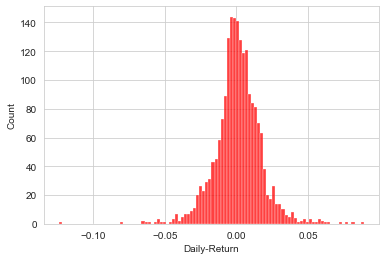

In [40]:
sns.histplot(x=df['Daily-Return'].head(2000).dropna(), bins=100, color='red')

Positive daily returns seemt o be slightly more frequent than negative returns for NASDAQ. 

# Conclusion 

The abvoe analysis can be used to understand a stock's short-term and long-term behaviour. 